## **Marcos Damián Pool Canul** | `200300591@ucaribe.edu.mx`

### Actividad #1 y #2 - Preparacion de datos

### Profesora: *Yarely Baez Lopez*

# Introducción

Según estimaciones de diferentes expertos, las fases de **entendimiento del negocio, de los datos y su preparación** pueden ocupar alrededor del $80\%$ del tiempo de desarrollo de un proyecto de minería de datos; son, por lo tanto, fases críticas dentro de la metodología **CRISP-DM**.

Desafortunadamente, con frecuencia, la urgencia de los equipos de ciencia de datos por aplicar técnicas estadísticas y generar resultados provoca que estas fases se desarrollen de forma descuidada comprometiendo el alcance del proyecto.

Una vez que se han identificado los objetivos que la organización plantea para el proyecto y las fuentes de datos necesarias para alcanzarlos, el equipo de ciencia de datos debe enfocarse en obtener los datos, explorarlos y **prepararlos** para aplicar sobre ellos técnicas de modelado. Esta última tarea debe ser enfatizada pues la mayoría de las aplicaciones de la minería de datos se realizan sobre conjuntos que no están estructurados como texto, imágenes o registros de actividad de usuarios en un sitio web.

# Preparación de datos

Considerando a la metodología CRISP-DM y lo descrito por Aggarwal en el segundo capítulo de su libro *Data Mining* algunas de las tareas más importantes que se desarrollan en la fase de preparación de datos son:

* Extracción de características.
* Limpieza de datos.
* Selección, reducción de datos y dimensionalidad.

En este documento exploraremos la tarea de extracción de características, mientras que a lo largo de las siguientes clases revisaremos el resto de las tareas.


## Extracción de características

Hemos ya descrito que las aplicaciones reales de la minería de datos se dan sobre conjuntos no-estructurados como texto, imágenes, audio, registros de actividad en la web y grafos. Desafortunadamente las metodologías estadísticas no funcionan de forma directa sobre este tipo de datos, por lo cual, es necesario extraer nuevas características derivadas de las originales.

En esta sección ejemplificaremos algunas de las técnicas de extracción de características para diferentes tipos de datos no estructurados.

### Documentos.

Una de las transformaciones más frecuentes para documentos compuestos por texto es la construcción de la matriz **documento-término**. La estructura de esta matriz es tal que cada fila se asocia a un documento diferente (puede ser un simple comentario generado en un sitio web) y cada columna a un término (palabra) diferente. De manera que el valor de la celda $M_{ij}$ indica la frecuencia con la que el término $j$-ésimo aparece en el documento $i$-ésimo.

$$\color{blue}{M_{ij} = \text{Total de veces que aparece el término j-ésimo en el documento i-ésimo}}$$

Considera los siguientes comentarios (documentos) guardados en la matriz *corpus*.

In [31]:
opiniones = [
            'aprender sobre analizar grandes volumenes de datos y encontrar patrones',
            'El manejo, limpieza y administración de los datos para un uso eficiente.',
            'Aprender más acerca de la minería de datos y sus usos en la vida cotidiana.'
         ]

El vocabulario definido por ambos documentos es el siguiente conjunto:

$$\{\text{aprender}, \text{analizar}, \text{grandes}, \text{volumenes}, \text{datos}, \text{encontrar}, \text{patrones}, \text{manejo},\text{limpieza}, \text{administracion},  \text{uso},\text{eficiente}, \text{acerca},\text{usos}, \text{vida}, \text{cotidiana}\}$$

Observa que hemos eliminado algunos términos poco relevantes. Hemos eliminado también acentos para facilitar el proceso de comentarios (no todos los autores de documentos respetan la ortografía).

Para este ejemplo, la matriz documento término  tiene la siguiente estructura:

$$
\begin{matrix}
  \hline
    \text{aprender}& \text{analizar}& \text{grandes}& \text{volumenes}& \text{datos}& \text{encontrar}& \text{patrones}& \text{manejo}&\text{limpieza}& \text{administracion} &  \text{uso}&\text{eficiente}& \text{acerca}&\text{usos}& \text{vida}& \text{cotidiana} \\
  \hline
  1 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0\\
  1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1\\
\end{matrix}
$$





En la práctica, construimos la matriz documento-término con ayuda alguna herramienta computacional como $\texttt{sklearn}$:

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=["a","de","un","la","sobre","y","el", "los", "para", "más", "sus", "en"]) #cuenta la frecuencia de ocurrencia de cada término en cada documento
X = vectorizer.fit_transform(opiniones)

La frecuencia con la que aparece cada palabra (término) se convierte en una característica de cada documento. Cada palabra se asocia con una **columna** de la matriz.

In [33]:
#columnas
print(vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))

['acerca' 'administración' 'analizar' 'aprender' 'cotidiana' 'datos'
 'eficiente' 'encontrar' 'grandes' 'limpieza' 'manejo' 'minería'
 'patrones' 'uso' 'usos' 'vida' 'volumenes']
17



Cada documento se asocia con una fila y cada celda de la matriz indica el total de apariciones de algún término en el documento:

In [34]:
import pandas as pd

df = pd.DataFrame(X.toarray())

df.columns = vectorizer.get_feature_names_out()
df.index = ["persona 1", "persona 2", "persona 3"]

df

,acerca,administración,analizar,aprender,cotidiana,datos,eficiente,encontrar,grandes,limpieza,manejo,minería,patrones,uso,usos,vida,volumenes
persona 1,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,1
persona 2,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0
persona 3,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0


Observa que con esta transformación hemos logrado representar a cada documento como un vector.

En la práctica, al aplicar esta transformación obtendremos vectores con una gran cantidad de elementos (dado que el vocabulario que compone a un lenguaje es muy extenso), por lo que puede sernecesario aplciar técnicas de reducción de la dimensionalidad.

## Imágenes

Puede obtenerse una representación alternativa de una imagen a partir del histograma de frecuencias de sus tonos de gris o de cada una de las bandas de colores como puede observarse en la siguientes celdas.

In [35]:
# %pip install opencv-python

In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

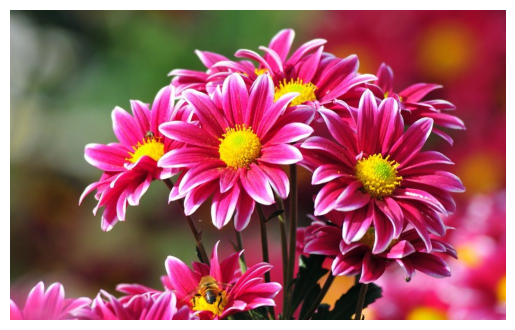

In [37]:
im = cv2.imread("./files/flores-bonitas.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im)
plt.axis('off')
plt.show()

La imagen se representa con tres matrices de 625 filas y 1000 columns:

In [38]:
im.shape

(625, 1000, 3)

Un total de 625000 celdas (pixeles) cada una formada mediante la combinación de tres colores básicos: rojo, verde y azul.

In [39]:
im.shape[0]*im.shape[1]

625000

**Canal rojo**

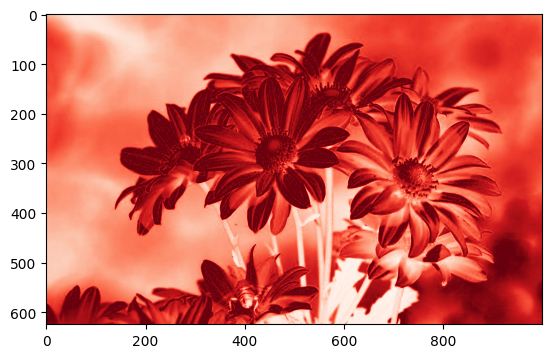

In [40]:
im_red = im[:,:,0]
plt.imshow(im_red, cmap="Reds")
plt.show()

**Canal verde**:

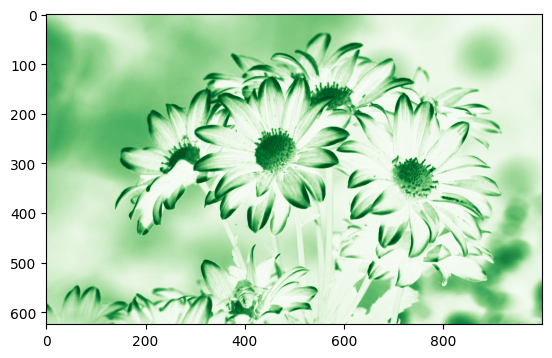

In [41]:
im_green = im[:,:,1]
plt.imshow(im_green, cmap="Greens")
plt.show()

**Canal azul**

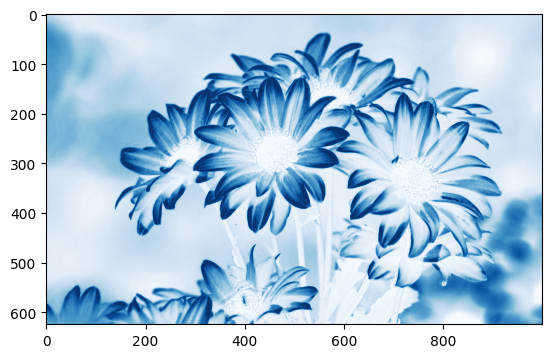

In [42]:
im_blue = im[:,:,2]
plt.imshow(im_blue, cmap="Blues")
plt.show()

Valores de la matriz (pixeles)

In [43]:
im_red[:10, :10] #primeras 10 filas y primeras 10 columnas de la componente roja


array([[64, 65, 64, 63, 61, 60, 60, 60, 58, 58],
       [67, 67, 66, 65, 64, 62, 62, 62, 61, 61],
       [70, 70, 69, 68, 67, 66, 65, 65, 65, 64],
       [73, 72, 71, 70, 70, 69, 68, 67, 67, 66],
       [76, 74, 73, 72, 73, 72, 70, 68, 68, 68],
       [80, 77, 75, 75, 76, 76, 73, 71, 70, 70],
       [84, 81, 78, 78, 80, 80, 77, 74, 74, 74],
       [86, 83, 80, 80, 82, 82, 80, 76, 77, 77],
       [90, 89, 88, 87, 86, 85, 84, 83, 83, 82],
       [93, 92, 91, 90, 89, 88, 87, 86, 86, 84]], dtype=uint8)

In [44]:
np.min(im_red)

0

In [45]:
np.max(im_red)

255

In [46]:
im_green[:10, :10]

array([[ 78,  79,  78,  77,  74,  73,  73,  73,  71,  71],
       [ 81,  81,  80,  79,  77,  75,  75,  75,  74,  74],
       [ 84,  84,  83,  82,  80,  79,  78,  78,  78,  77],
       [ 87,  86,  85,  84,  84,  82,  81,  80,  80,  79],
       [ 91,  89,  87,  86,  87,  86,  83,  81,  81,  81],
       [ 95,  92,  89,  89,  90,  90,  86,  84,  83,  83],
       [ 97,  94,  91,  91,  92,  92,  89,  86,  86,  86],
       [ 99,  96,  93,  93,  95,  94,  92,  88,  89,  89],
       [103, 102, 101, 100,  99,  98,  96,  95,  95,  94],
       [105, 105, 104, 103, 102, 101,  99,  98,  98,  96]], dtype=uint8)

In [47]:
np.min(im_green)

0

In [48]:
np.max(im_green)

255

In [49]:
im_blue[:10, :10]

array([[63, 64, 65, 64, 65, 64, 64, 64, 62, 62],
       [66, 66, 67, 66, 67, 66, 66, 66, 65, 65],
       [67, 67, 68, 69, 70, 69, 69, 69, 69, 68],
       [70, 69, 70, 69, 71, 72, 72, 71, 71, 70],
       [72, 70, 70, 71, 74, 73, 73, 71, 72, 72],
       [76, 73, 72, 72, 75, 77, 76, 74, 74, 74],
       [79, 76, 73, 74, 78, 78, 77, 74, 76, 76],
       [81, 78, 75, 76, 78, 80, 80, 76, 79, 79],
       [86, 85, 84, 83, 82, 81, 82, 81, 83, 84],
       [91, 88, 87, 86, 85, 84, 85, 84, 86, 84]], dtype=uint8)

In [50]:
np.min(im_blue)

0

In [51]:
np.max(im_blue)

255

**Histograma de frecuencias**

Obtenemos una representación alternativa de cada canal mediante el histograma de frecuencias.

In [52]:
#histograma de frecuencia de la banda roja
h = np.histogram(im[:,:,0], bins=16)
h[0]

array([  7999,   8061,  14142,  27516,  56624,  56911,  35518,  33981,
        40627,  58203,  50722,  33426,  27216,  31233,  37767, 105054],
      dtype=int64)

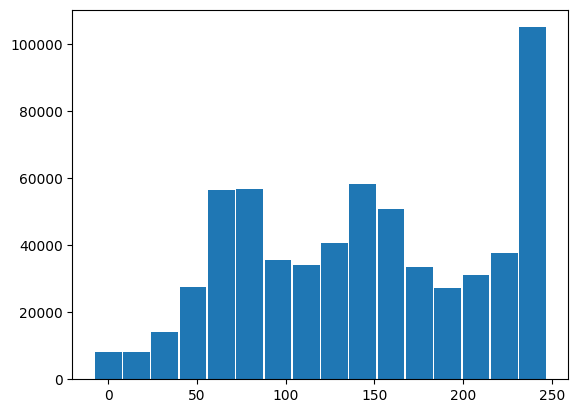

In [53]:
plt.bar(h[1][0:-1], h[0], width = 15)
plt.show()

In [54]:
#histograma de frecuencia de la banda verde
h = np.histogram(im[:,:,1], bins=16)
h[0]

array([ 79132, 102242,  77322,  60392,  54045,  54330,  50338,  44797,
        26219,  24897,  10287,   8090,   8316,   8246,   8371,   7976],
      dtype=int64)

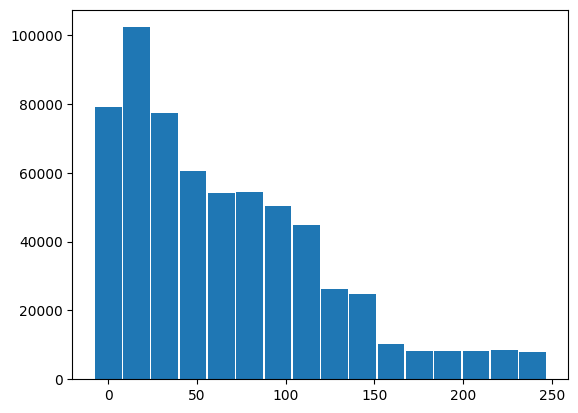

In [55]:
plt.bar(h[1][0:-1], h[0], width = 15)
plt.show()

Otra alternativa para caracterizar a la imagen consiste en aplicar la técnica de **análisis de componentes principales**.

# Conclusión

En las aplicaciones de minería de datos es necesario transformar conjuntos de datos no estructurados para posibilitar la aplicación de técnicas de modelado y extraer de ellas información valiosa para la toma de decisiones.

En este documento revisamos cómo extraer características de texto e imágenes. A lo largo del curso retomaremos algunas de estas técnicas para aplicaciones específicas como la minería de texto.

<font color="red">Actividad 1  </font>

1. Construye un vector que contenga las respuestas a la pregunta "¿Qué expectativas tienes acerca de la clase de Minería de Datos?"
2. Construye la matriz documento término del vector del punto anterior. Asegúrate de eliminar palabras poco relevantes.

In [56]:
opiniones_full = [
            'Aprender a obtener datos, limpiar y transformar datos',
            'Conocer a fondo los conceptos de minería de datos y las herramientas para su aplicación',
            'Encontrar de forma eficiente anomalías, patrones o relación entre los datos analizado',
            'Aprender a extraer y entender patrones en los datos',
            'Aprender a utilizar imágenes o archivos no estructurados para detectar patrones útiles',
            'Aprender  a resumir grandes cantidades de comentarios en clasificaciones, tomando como referencia las palabras contempladas en el texto',
            'Aprender a manipular los datos a través de distintas técnicas',
            'Aprender sobre el manejo de grandes volúmenes de datos, para la exploración y detección en patrones en ventas',
            'Aprender a examinar grandes conjuntos de datos para identificar patrones o tendencias',
            'aprender sobre analizar grandes volumenes de datos y encontrar patrones',
            'El manejo, limpieza y administración de los datos para un uso eficiente.',
            'Aprender más acerca de la minería de datos y sus usos en la vida cotidiana.',
            'Aprender acerca del flujo de datos y cómo poder utilizarlos para mejorar procesos de analisis de datos',
            'Aprender cosas nuevas sobre el manejo de un gran volumen de datos',
            'Aprender a la manipulacion de datos',
            'Principalmente a como manejar de forma mas eficiente los métodos del manejo de los datos para una posterior implementación o uso de los mismos en cualquier otro aspecto'
         ]

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Creamos un CountVectorizer con las stop words
vectorizer = CountVectorizer(stop_words=["a","de","un","la","sobre","y","el", "los", "para", "más", "sus", "en", "como", "las", "su", "una", "mas", "del", "otro", "no", "más", "entre", "cómo"])

# Transformamos las respuestas en una matrix
document_term_matrix = vectorizer.fit_transform(opiniones_full)

# Obtenemos los terminos para las columnas
terms = vectorizer.get_feature_names_out()

# Creamos un DataFrame con pandas
import pandas as pd

df_document_term = pd.DataFrame(document_term_matrix.toarray(), columns=terms)

# Mostramos el data frame
df_document_term

,acerca,administración,analisis,analizado,analizar,anomalías,aplicación,aprender,archivos,aspecto,...,uso,usos,utilizar,utilizarlos,ventas,vida,volumen,volumenes,volúmenes,útiles
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
print(terms)

['acerca' 'administración' 'analisis' 'analizado' 'analizar' 'anomalías'
 'aplicación' 'aprender' 'archivos' 'aspecto' 'cantidades'
 'clasificaciones' 'comentarios' 'conceptos' 'conjuntos' 'conocer'
 'contempladas' 'cosas' 'cotidiana' 'cualquier' 'datos' 'detección'
 'detectar' 'distintas' 'eficiente' 'encontrar' 'entender' 'estructurados'
 'examinar' 'exploración' 'extraer' 'flujo' 'fondo' 'forma' 'gran'
 'grandes' 'herramientas' 'identificar' 'implementación' 'imágenes'
 'limpiar' 'limpieza' 'manejar' 'manejo' 'manipulacion' 'manipular'
 'mejorar' 'minería' 'mismos' 'métodos' 'nuevas' 'obtener' 'palabras'
 'patrones' 'poder' 'posterior' 'principalmente' 'procesos' 'referencia'
 'relación' 'resumir' 'tendencias' 'texto' 'tomando' 'transformar'
 'través' 'técnicas' 'uso' 'usos' 'utilizar' 'utilizarlos' 'ventas' 'vida'
 'volumen' 'volumenes' 'volúmenes' 'útiles']


### Data frame Ordenado en Orden Ascendente

In [59]:
# Calcular la suma de frecuencia de cada palabra en las columnas
word_frequencies = df_document_term.sum()

# Crear un DataFrame con las palabras y sus frecuencias
word_frequency_df = pd.DataFrame({'Palabra': word_frequencies.index, 'Frecuencia': word_frequencies.values})

# Ordenar el DataFrame por frecuencia en orden ascendente
word_frequency_df_sorted = word_frequency_df.sort_values(by='Frecuencia', ascending=False)

# Obtener la lista de columnas en el orden deseado
columnas_ordenadas = word_frequency_df_sorted['Palabra']

# Reorganizar el DataFrame original con las columnas en el nuevo orden
df_document_term = df_document_term[columnas_ordenadas]

# Mostrar el DataFrame con las columnas ordenadas
df_document_term

,datos,aprender,patrones,grandes,manejo,eficiente,acerca,minería,uso,forma,...,fondo,extraer,detección,exploración,examinar,estructurados,entender,distintas,detectar,útiles
0,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
5,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1,1,1,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
8,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<font color="red">Actividad 2 </font>


1.   Grafica el histograma de la frecuencia de la banda azul
2.   Realiza un gráfico dónde se combinen los 3 histogramas: red, green y blue. Cada frecuencia debe corresponder con el color correspondiente.



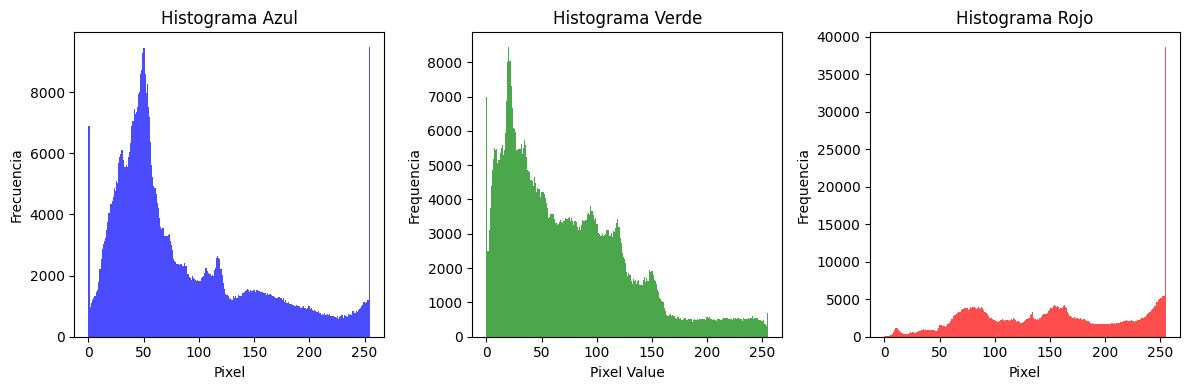

In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cragamos la imagen
im = cv2.imread("./files/flores-bonitas.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Extraemos los tres colores primarios
im_red = im[:, :, 0]
im_green = im[:, :, 1]
im_blue = im[:, :, 2]

# Mostramos el histograma de color azul
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(im_blue.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histograma Azul')
plt.xlabel('Pixel')
plt.ylabel('Frecuencia')

# Mostramos el histograma de color verde
plt.subplot(132)
plt.hist(im_green.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Histograma Verde')
plt.xlabel('Pixel Value')
plt.ylabel('Frequencia')

# Mostramos el histograma de color rojo
plt.subplot(133)
plt.hist(im_red.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Histograma Rojo')
plt.xlabel('Pixel')
plt.ylabel('Frequencia')

plt.tight_layout()

In [61]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar la imagen y convertirla a RGB
im = cv2.imread("flores-bonitas.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Crear histograma de frecuencia para la banda azul
h_blue = np.histogram(im[:,:,2], bins=16)
blue_values = h_blue[0]
blue_bins = h_blue[1][0:-1]

# Crear histograma de frecuencia para la banda roja
h_red = np.histogram(im[:,:,0], bins=16)
red_values = h_red[0]
red_bins = h_red[1][0:-1]

# Crear histograma de frecuencia para la banda verde
h_green = np.histogram(im[:,:,1], bins=16)
green_values = h_green[0]
green_bins = h_green[1][0:-1]

# Crear una figura y mostrar los tres histogramas en el mismo gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(blue_bins, blue_values, width=15, alpha=0.5, color='blue', label='Canal Azul')
plt.bar(red_bins, red_values, width=15, alpha=0.5, color='red', label='Canal Rojo')
plt.bar(green_bins, green_values, width=15, alpha=0.5, color='green', label='Canal Verde')

plt.title('Histogramas de los Canales de Color')
plt.xlabel('Valor de Píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
